In [3]:
import numpy as np
import pandas as pd 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier


import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output


import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

from nltk.tokenize import sent_tokenize, word_tokenize


from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df=pd.read_csv('TwitterHate.csv' )

In [5]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df.label.value_counts()[0]/df.shape[0]




0.9298542018647143

In [7]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
df.shape

(31962, 3)

In [9]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
stopwords = nltk.corpus.stopwords.words('english')

In [11]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Zeba R
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
nltk.download('punkt')



[nltk_data] Downloading package punkt to C:\Users\Zeba R
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df["tweet"]=df.tweet.str.lower()


In [15]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


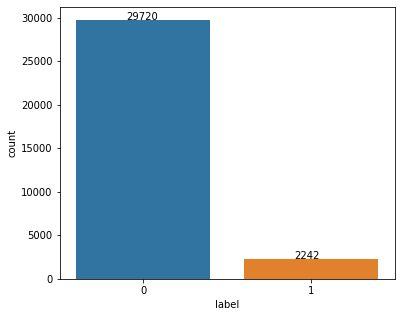

In [16]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure( figsize=(6,5))


# create count plot
ax = sn.countplot(x='label', data=df)

# annotate
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+50))

In [17]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+', '' , text)
    text=re.sub(r'#', '' , text)
    text=re.sub(r'https?:\/\/s' , '', text)
    text=re.sub(r'rt[/s]+' ,'' ,text)
    text=re.sub(r'\.?' ,'' ,text)
    
    return text


In [18]:
df['tweet']=df['tweet'].apply(cleanTxt)

In [19]:
df['tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for lyft credit i can't use cause the...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                    factsguide: society now    motivation
                               ...                        
31957    ate  isz that youuu?ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     sikh temple vandalised in in calgary, wso con...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

In [20]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
tokenize_data=df['tweet'].apply(tt.tokenize)

In [21]:
tokenize_data

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, lyft, credit, i, can't, use, cau...
2                                  [bihday, your, majesty]
3        [model, i, love, u, take, with, u, all, the, t...
4                [factsguide, :, society, now, motivation]
                               ...                        
31957    [ate, isz, that, youuu, ?, ð, , , , ð, , ...
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [sikh, temple, vandalised, in, in, calgary, ,,...
31961                       [thank, you, for, you, follow]
Name: tweet, Length: 31962, dtype: object

In [22]:
def stopwordCleaning(text):

    
    word=[word for word in  text if word not in stopwords and len(word)>1]#removing stopword and word of length 1
    return word
  


In [23]:
df['tweet']=tokenize_data.apply(stopwordCleaning)


In [24]:
list_data=list(df.tweet)
list_data

[['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run'],
 ['thanks',
  'lyft',
  'credit',
  "can't",
  'use',
  'cause',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'majesty'],
 ['model', 'love', 'take', 'time', 'urð'],
 ['factsguide', 'society', 'motivation'],
 ['2/2',
  'huge',
  'fan',
  'fare',
  'big',
  'talking',
  'leave',
  'chaos',
  'pay',
  'disputes',
  'get',
  'allshowandnogo'],
 ['camping', 'tomorrow', 'dannyâ'],
 ['next',
  'school',
  'year',
  'year',
  'examsð',
  "can't",
  'think',
  'school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['love',
  'land',
  'allin',
  'cavs',
  'champions',
  'cleveland',
  'clevelandcavaliers'],
 ['welcome', "i'm", 'gr8'],
 ['ireland',
  'consumer',
  'price',
  'index',
  'mom',
  'climbed',
  'previous',
  '02',
  '05',
  'may',
  'blog',
  'silver',
  'gold',
  'forex'],
 ['selfish',
  'orlando',
  'standwithorlando'

In [25]:
single_list=[]
for i in list_data:
    for word in i:
        
        single_list.append(word)
single_list
            

['father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run',
 'thanks',
 'lyft',
 'credit',
 "can't",
 'use',
 'cause',
 'offer',
 'wheelchair',
 'vans',
 'pdx',
 'disapointed',
 'getthanked',
 'bihday',
 'majesty',
 'model',
 'love',
 'take',
 'time',
 'urð',
 'factsguide',
 'society',
 'motivation',
 '2/2',
 'huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo',
 'camping',
 'tomorrow',
 'dannyâ',
 'next',
 'school',
 'year',
 'year',
 'examsð',
 "can't",
 'think',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'love',
 'land',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'welcome',
 "i'm",
 'gr8',
 'ireland',
 'consumer',
 'price',
 'index',
 'mom',
 'climbed',
 'previous',
 '02',
 '05',
 'may',
 'blog',
 'silver',
 'gold',
 'forex',
 'selfish',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 's

In [26]:
from collections import Counter

counts = Counter(single_list)

print(counts)

Counter({'love': 2669, 'day': 2249, 'happy': 1684, 'time': 1116, 'like': 1097, 'life': 1094, "i'm": 1011, 'today': 1002, 'new': 987, 'positive': 928, 'thankful': 920, 'get': 918, 'people': 857, 'good': 846, 'bihday': 833, 'one': 782, 'see': 758, "can't": 740, 'smile': 686, '2016': 663, 'go': 653, 'want': 646, 'take': 622, 'work': 612, 'healthy': 600, 'weekend': 585, 'fun': 568, 'summer': 556, 'make': 547, 'us': 537, 'got': 532, 'friday': 515, 'great': 513, 'best': 513, 'family': 511, 'need': 509, 'way': 506, 'bull': 504, 'beautiful': 501, 'going': 489, 'friends': 489, 'days': 485, 'first': 477, 'really': 474, 'wait': 463, 'music': 458, 'morning': 445, 'back': 441, 'world': 432, 'know': 429, 'tomorrow': 423, 'week': 418, 'sad': 417, "father's": 417, 'never': 417, 'fathersday': 414, 'orlando': 413, 'cute': 412, 'think': 405, 'feel': 390, 'blog': 384, 'happiness': 381, 'trump': 375, 'much': 373, 'model': 371, 'home': 370, 'sunday': 368, 'right': 368, 'affirmation': 364, 'night': 361, ':)'

In [27]:
def func(txt):
    string=' '.join(txt)
    return string

In [28]:
df['tweet']=df['tweet'].apply(func)

In [29]:
df['tweet']

0        father dysfunctional selfish drags kids dysfun...
1        thanks lyft credit can't use cause offer wheel...
2                                           bihday majesty
3                                 model love take time urð
4                            factsguide society motivation
                               ...                        
31957                                        ate isz youuu
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960      sikh temple vandalised calgary wso condemns act
31961                                         thank follow
Name: tweet, Length: 31962, dtype: object

In [30]:
X=df.tweet

In [31]:
y=df.label

In [32]:
df.drop('id' ,axis=1 ,inplace=True)

In [33]:
df.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit can't use cause offer wheel...
2,0,bihday majesty
3,0,model love take time urð
4,0,factsguide society motivation


In [34]:
X.head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit can't use cause offer wheel...
2                                       bihday majesty
3                             model love take time urð
4                        factsguide society motivation
Name: tweet, dtype: object

In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range=(1,2))


feature_vector = tfidf_vectorizer.fit(df.tweet )
train_ds_features = tfidf_vectorizer.transform( df.tweet)
features = feature_vector.get_feature_names()

In [40]:
features

['00',
 '000',
 '01',
 '02',
 '03',
 '039',
 '05',
 '06',
 '06 16',
 '10',
 '10 days',
 '10 years',
 '100',
 '100 amazing',
 '1000',
 '10k',
 '11',
 '11th',
 '12',
 '13',
 '13th',
 '14',
 '14th',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1gabba',
 '1gabba vk',
 '1st',
 '1st time',
 '20',
 '20 speakers',
 '200',
 '2008',
 '2014',
 '2015',
 '2016',
 '2016 30',
 '2016 flag',
 '2016 leadership',
 '2016in4words',
 '2016â',
 '2017',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '24th',
 '25',
 '26',
 '26th',
 '27',
 '28',
 '29',
 '2b',
 '2day',
 '2jive',
 '2jive another',
 '2nd',
 '2pac',
 '30',
 '30 photos',
 '31',
 '35',
 '3d',
 '3d really',
 '3rd',
 '40',
 '40404',
 '42',
 '45',
 '46',
 '48',
 '49',
 '4follow',
 '4like',
 '4like likeforlike',
 '4th',
 '4u',
 '4wd',
 '50',
 '50 dead',
 '50 people',
 '500',
 '53',
 '5th',
 '60',
 '6th',
 '70',
 '80',
 '8th',
 '90',
 '90th',
 '93',
 '95',
 '9th',
 'aap',
 'abc',
 'able',
 'abrahamhicks',
 'abrahamhicks lawofattraction',
 'absolute',
 'absolutely

In [41]:
# Convert the document vector matrix into dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())
# Assign the features names to the column
train_ds_df.columns = features
# Assign the sentiment labels to the train_ds
train_ds_df['label'] = df.label
train_ds_df

,00,000,01,02,03,039,05,06,06 16,10,...,¾ï,¾ð,¾ð ¾ð,à¹,à¹ à¹,ï¼,ï¼ ï¼,ó¾,ó¾ ó¾,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [42]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,train_ds_df['label'],test_size = 0.3,random_state = 42 )

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_X.toarray(), train_y)
test_ds_predicted = logreg.predict( test_X.toarray() )

In [44]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8905
           1       0.90      0.31      0.46       684

    accuracy                           0.95      9589
   macro avg       0.92      0.66      0.72      9589
weighted avg       0.95      0.95      0.94      9589



In [45]:
 metrics.accuracy_score( test_y, test_ds_predicted )

0.9484826363541558

In [46]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(train_ds_features,y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 29720, 1: 2242})
Resample dataset shape Counter({0: 2242, 1: 2242})


In [47]:
from sklearn.model_selection import train_test_split
train_X1, test_X1, train_y1, test_y1 = train_test_split( x_rus, y_rus,test_size = 0.2,random_state = 42 )

In [48]:
logreg1 = LogisticRegression()
logreg1.fit(train_X1.toarray(), train_y1)
test_ds_predicted1 = logreg.predict( test_X1.toarray() )

In [49]:
from sklearn import metrics
print( metrics.classification_report( test_y1, test_ds_predicted1) )

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       443
           1       1.00      0.34      0.51       454

    accuracy                           0.67       897
   macro avg       0.80      0.67      0.63       897
weighted avg       0.80      0.67      0.63       897



In [50]:
metrics.accuracy_score( test_y1, test_ds_predicted1) 

0.6677814938684504

In [51]:
metrics.confusion_matrix(test_y1, test_ds_predicted1)

array([[443,   0],
       [298, 156]], dtype=int64)

In [52]:
lr = LogisticRegression(C=9,penalty='l2',dual=False,max_iter=110)
lr.fit(x_rus,y_rus)


LogisticRegression(C=9, max_iter=110)

In [53]:
lr.score(x_rus,y_rus)

0.9814897413024085

In [59]:
from sklearn.model_selection import cross_val_score ,StratifiedKFold

In [60]:
skf = StratifiedKFold(n_splits=4, random_state=7)

C:\Users\Zeba R Khan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [61]:
result = cross_val_score(lr, x_rus, y_rus, cv=skf, scoring='recall')
print(result.mean())


0.8296186656480775
